# 6_ 2 - MODELO DE EJECUCIÓN CON LOS DATOS DE PRUEBA CON EL **RIDGE CLASSIFIER**

En este notebook vamos a cargar el dataset de prueba y realizaremos la calidad de datos, separaremos predictoras y target, predeciremos sobre los datos de prueba y evaluaremos el modelo definitivo.

## IMPORTAR LOS PAQUETES

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt 

#transformación de datos
from sklearn.preprocessing import OrdinalEncoder

#modelo

from sklearn.linear_model import RidgeClassifier

#metricas de evaluación
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Crear Pipeline
from sklearn.pipeline import make_pipeline

import cloudpickle

## CARGAR LOS DATOS

In [3]:
df = pd.read_csv('../../02_Datos/02_Validacion/prueba.csv', index_col= 0)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target
190,N,N,N,N,N,N,B
10,P,P,P,P,A,P,NB
191,P,N,N,N,A,A,B
168,A,A,N,N,N,N,B
130,A,A,A,A,P,A,NB
...,...,...,...,...,...,...,...
60,A,A,A,P,P,A,NB
37,A,N,A,P,P,A,NB
22,A,A,A,A,P,A,NB
77,A,P,A,P,A,P,NB


## TRANSFORMACIÓN DE DATOS

### Variables a aplicar Ordinal Encoder

In [4]:
var_oe = ['industrial_risk',
            'management_risk',
            'financial_flexibility',
            'credibility',
            'competitiveness',
            'operating_risk']


### Orden y categoría de las variables

In [5]:
orden_industrial = ['N','A','P']
orden_management = ['N','A','P']
orden_financial = ['N','A','P']
orden_credibility = ['N','A','P']
orden_competitiveness = ['N','A','P']
orden_operating = ['N','A','P']

categorias = [orden_industrial,
              orden_management,
              orden_financial,
              orden_credibility,
              orden_competitiveness,
              orden_operating]


### Instanciar Ordinal Encoder

In [6]:
oe = OrdinalEncoder(categories= categorias, 
                    handle_unknown= 'use_encoded_value',
                    unknown_value= -99)

### Entrenar y aplicar

In [7]:
df_oe = oe.fit_transform(df[var_oe])

In [8]:
nombre_oe = [variable + '_oe' for variable in var_oe]
x = pd.DataFrame(df_oe, columns= nombre_oe)
x

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe
0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,2.0,2.0,1.0,2.0
2,2.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...
57,1.0,1.0,1.0,2.0,2.0,1.0
58,1.0,0.0,1.0,2.0,2.0,1.0
59,1.0,1.0,1.0,1.0,2.0,1.0
60,1.0,2.0,1.0,2.0,1.0,2.0


## APLICAR TRANSFORMACIÓN BINARIA A LA TARGET

In [9]:
y = df.target.replace({'B':1 , 'NB': 0}).reset_index().copy()
y.drop(columns= 'index', inplace= True)
y

,target
0,1
1,0
2,1
3,1
4,0
...,...
57,0
58,0
59,0
60,0


## MODELIZAR CON EL PIPE DE EJECUCIÓN

### CARGAMOS EL PIPE DE EJECUCIÓN

In [10]:
modelo = pd.read_pickle('../../04_Modelos/pipe_ejecucion_v1.pickle')

## PREDECIR Y EVALUAR CON LOS DATOS DE PRUEBA

### PREDECIR SOBRE LOS DATOS

In [11]:
pred = modelo.predict(x)
#pred_proba = modelo.predict_proba(x)[:,1]

### EVALUAR SOBRE LOS DATOS

In [12]:
#v_roc_auc_proba = roc_auc_score(y, pred_proba)
v_roc_auc = roc_auc_score(y, pred)
v_accuracy = accuracy_score(y, pred)
v_report = classification_report(y, pred)

#print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        22

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

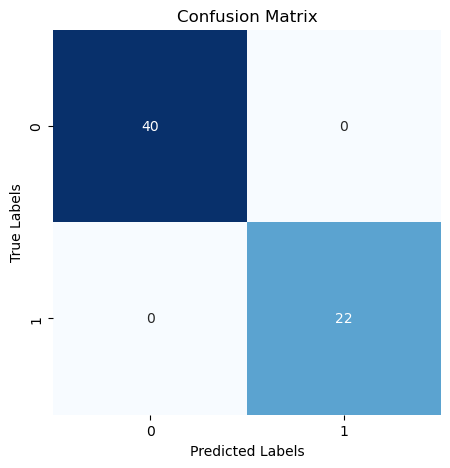

In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

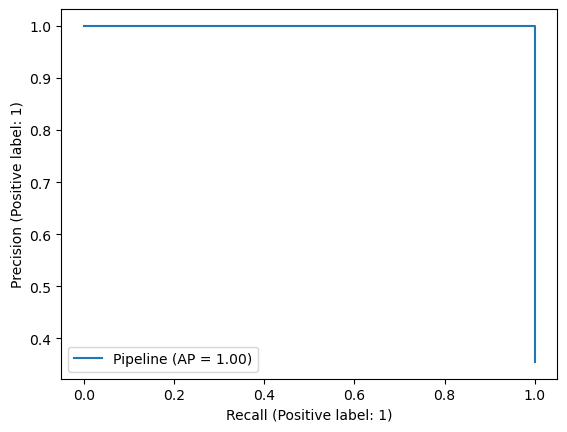

In [14]:
PrecisionRecallDisplay.from_estimator(modelo, x, y);

### ROC Chart

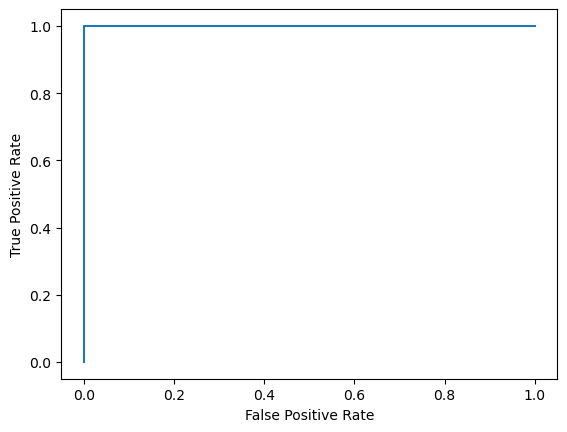

In [15]:
y_score = modelo.decision_function(x)
fpr, tpr, _ = roc_curve(y, y_score, pos_label=modelo.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### **CONCLUSIÓN:**

El modelo ha funcionado muy bien con los datos de prueba obteniendo un 100% roc_auc sobre los [1].

Al ser un scoring de riesgo bancario muchas veces se precisa de una interpretación de los datos para comunicar el motivo al cliente. Vamos a solicitar los coeficientes y el intercepto para calcular el scoring según las variables del cliente.

### COEFICIENTE Y INTERCEPTO DEL MODELO

In [28]:
# Obtén el estimador interno (RidgeClassifier) del pipeline
ridge_classifier = modelo.named_steps['ridgeclassifier']

# Obtén el coeficiente y intercepto
coeficientes = ridge_classifier.coef_
intercepcion = ridge_classifier.intercept_

# Imprimir los coeficientes de las características
print("Coeficientes de las características:")
for i, coef in enumerate(coeficientes[0]):
    print(f"Característica {i + 1}: {coef:.4f}")

# Imprimir el término de intercepción (sesgo)
print("Término de intercepción (sesgo):", intercepcion[0])

Coeficientes de las características:
Característica 1: -0.0438
Característica 2: -0.0531
Característica 3: -0.2422
Característica 4: -0.2066
Característica 5: -0.6489
Característica 6: -0.0787
Término de intercepción (sesgo): 0.974061742352917


### FUNCIÓN PARA CALCULAR EL SCORING DEL CLIENTE

In [32]:
def de_logit_a_prob(modelo, test_x):
    test_x = np.array(test_x)
    logit = modelo.intercept_ + np.sum(modelo.coef_ * test_x, axis=1)
    proba = 1 / (1 + np.exp(-logit))
    return proba

# Obtén el estimador interno (RidgeClassifier) del pipeline
modelo_especifico = modelo.named_steps['ridgeclassifier']

# Valores manuales de un nuevo cliente
valores_manuales = [[2, 0, 0, 0, 0, 0]]  # Ejemplo de valores manuales para características

# Calcular las probabilidades utilizando la función de_logit_a_prob
probabilidades = de_logit_a_prob(modelo_especifico, valores_manuales)

# Imprimir las probabilidades calculadas
print("Probabilidades:", probabilidades)

Probabilidades: [0.70815425]


**PRÓXIMOS PASOS:** 

También realizaremos un modelo de tipo Árbol de decisión para ver el flujo de las variables y los valores para una mejor interpretación.